#  Step 1: Load and Explore the Datase

In [1]:
# Import necessary libraries
import pandas as pd

# Read the CSV file into a DataFrame
data = pd.read_csv("Fish.csv")
df = pd.DataFrame(data)

# Show a quick preview of the dataset
df.head()

# Display info about data types and missing values
df.info()

# Summary statistics for numerical columns
df.describe()

# Get all unique fish species
fish_types = df['Species'].unique()
print(fish_types)

# Extract all numerical feature columns
features = df.select_dtypes(include="number").columns.to_list()
print(features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB
['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']


# Step 2: Set Visualization Theme (Using Seaborn & Matplotlib)

In [2]:
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

# Define general plotting aesthetics
sns.set(rc={"figure.figsize": [15, 8]}, font_scale=1.2)
sns.set(rc={"axes.facecolor":"#F2F3F4","figure.facecolor":"#F2F3F4"})

# Define a custom color palette
palette = ["#F08080", "#FA8072", "#E9967A", "#FFA07A", "#CD5C5C", "#AF601A", "#CA6F1E"]
sns.set_palette(palette)
color_map = colors.ListedColormap(palette)

# Step 3: Plot Histograms with KDE for Numerical Feature

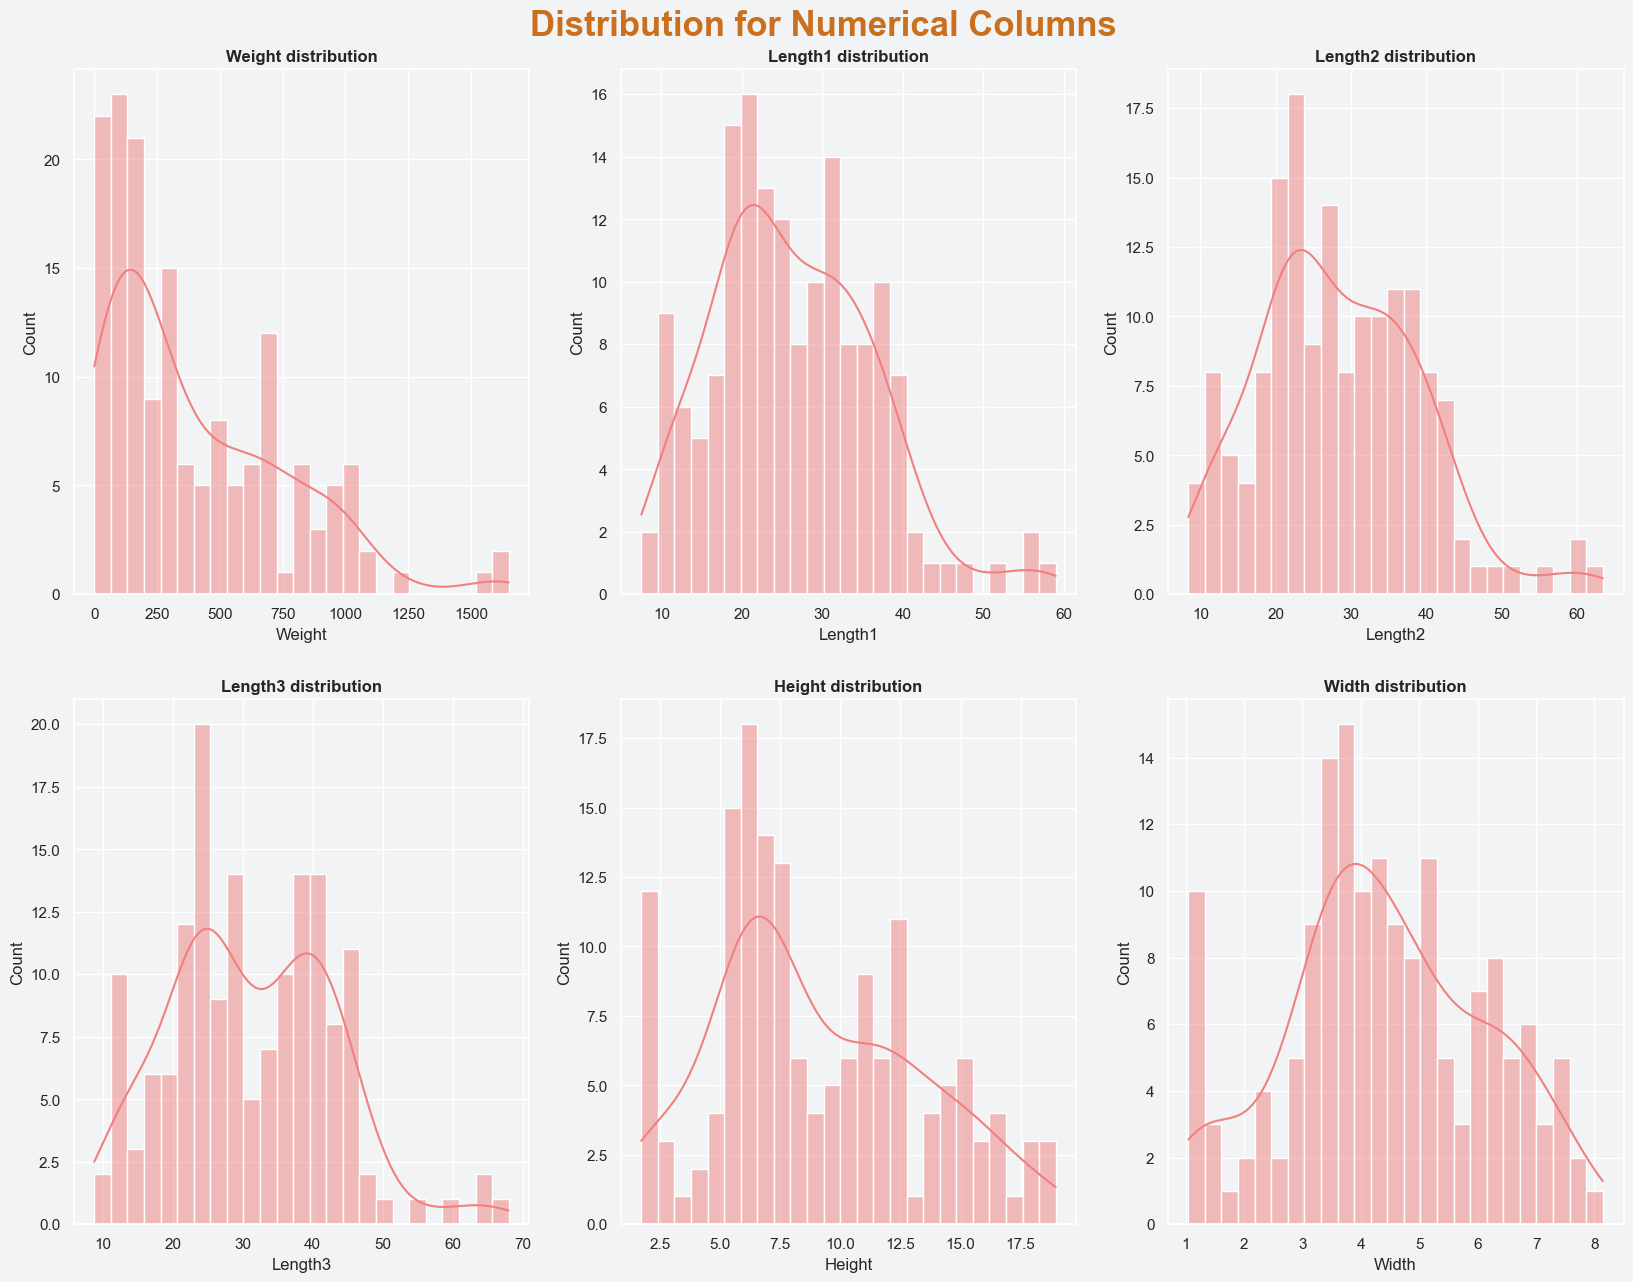

In [3]:
plt.figure(figsize=(20, 15))

# Loop through numerical features and plot histograms
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=df, x=col, bins=25, kde=True)
    plt.title(f"{col} distribution", weight="bold")

plt.suptitle("Distribution for Numerical Columns", weight="bold", fontsize=25, x=0.5, y=0.92, color="#CA6F1E")
plt.show()

# Step 4: Detect Outliers using Boxplots and Swarmplot

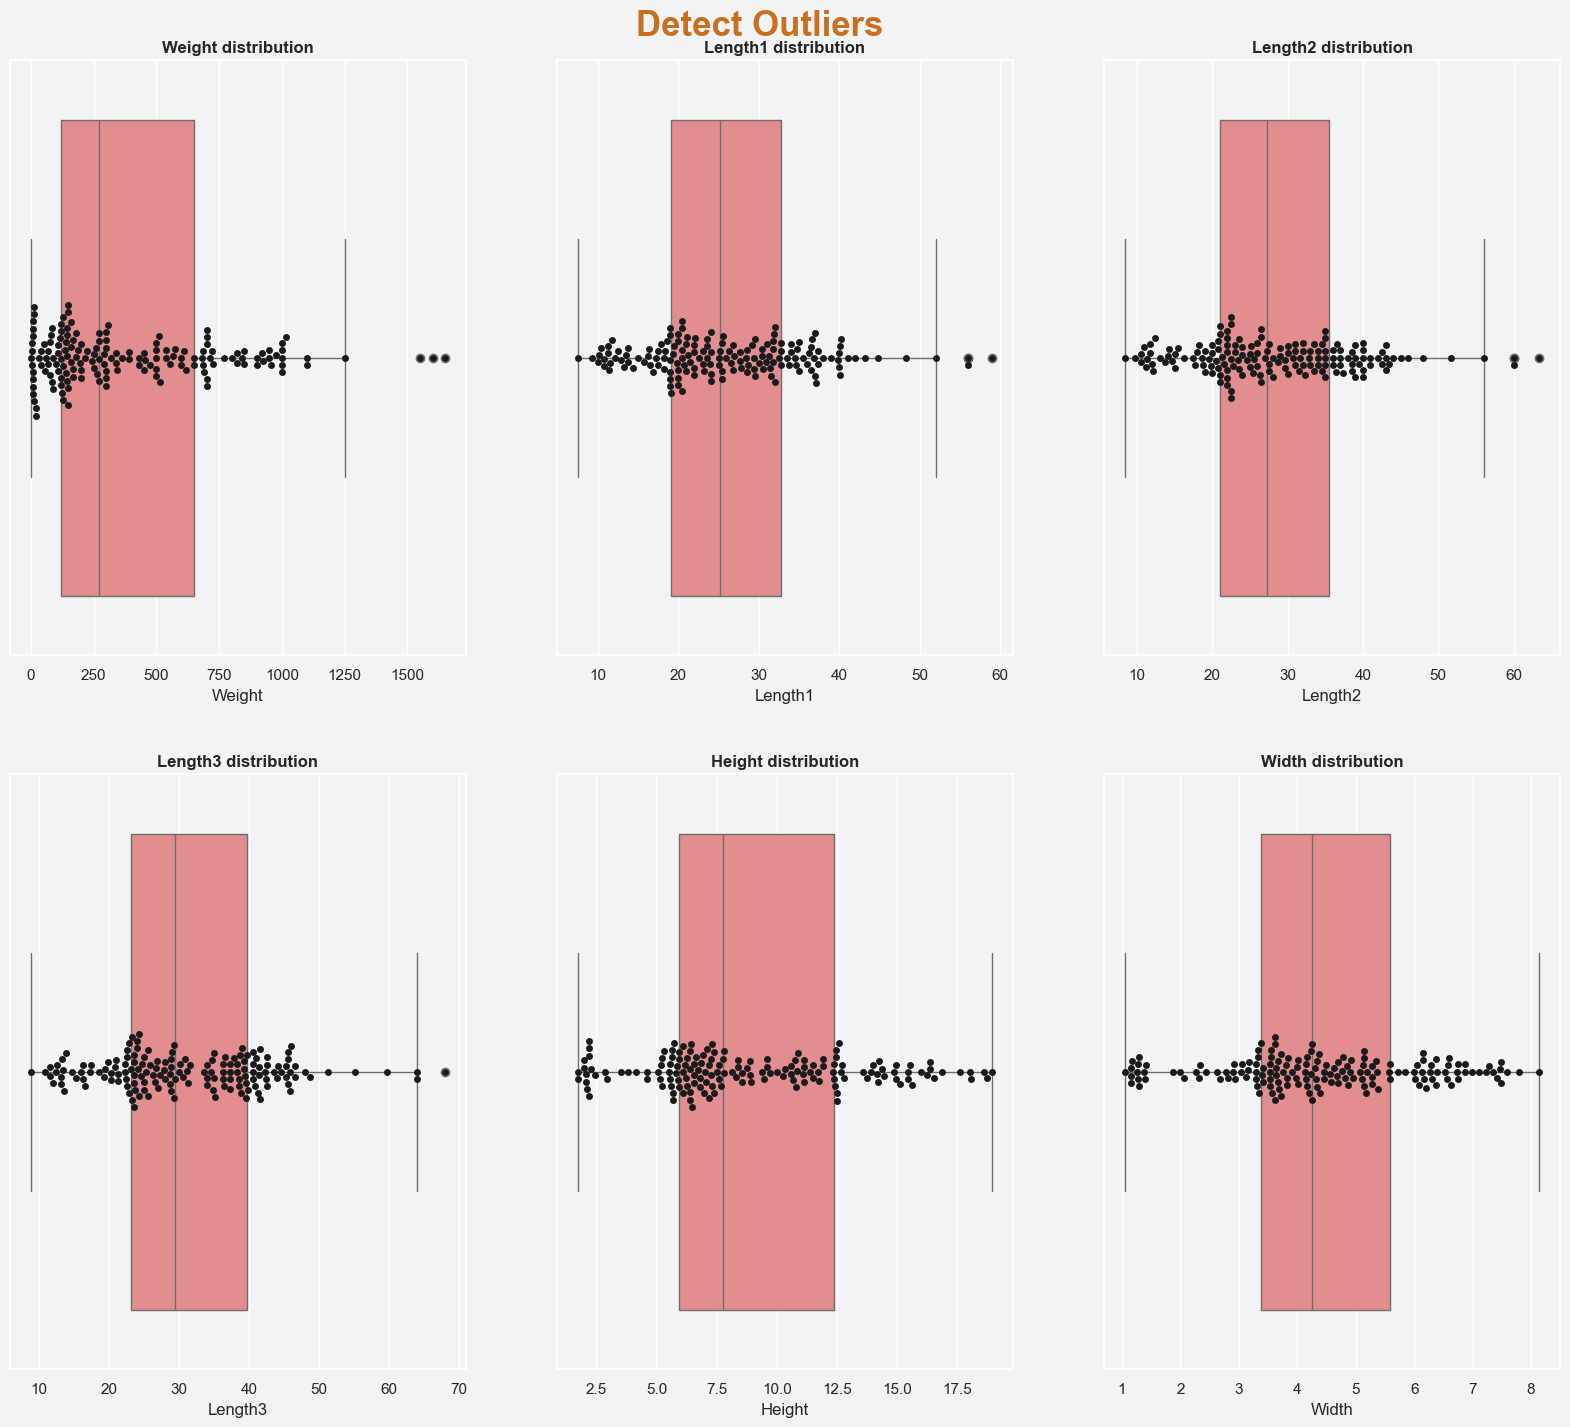

In [4]:
plt.figure(figsize=(20, 17))

for idx, column in enumerate(features):
    plt.subplot(2, 3, idx + 1)
    sns.boxplot(data=df, x=column)
    sns.swarmplot(data=df, x=column, color="k")
    plt.title(f"{column} distribution", weight="bold")

plt.suptitle("Detect Outliers", weight="bold", fontsize=25, x=0.5, y=0.91, color="#CA6F1E")
plt.show()

# Step 5: Analyze the Distribution of Fish Specie

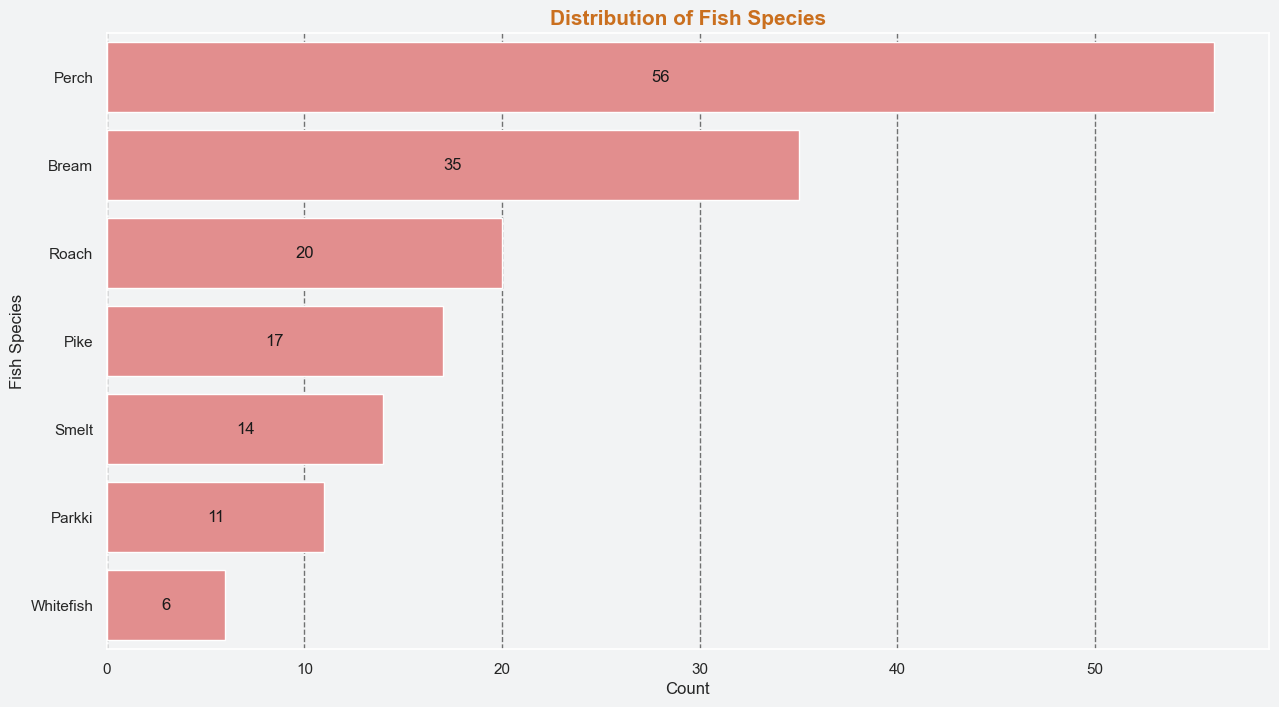

In [5]:
# Create a count plot for the categorical column "Species"
ax = sns.countplot(data=df, y="Species", order=df["Species"].value_counts().index)

# Add data labels to each bar
for container in ax.containers:
    ax.bar_label(container, label_type="center", color="k")

# Set title and axis labels
plt.title("Distribution of Fish Species", fontsize=15, weight="bold", color="#CA6F1E")
plt.xlabel("Count")
plt.ylabel("Fish Species")
plt.grid(axis="x", linestyle="--", alpha=0.6, c="k")

plt.show()

# Step 6: Investigate Correlation Between Weight and Length Columns

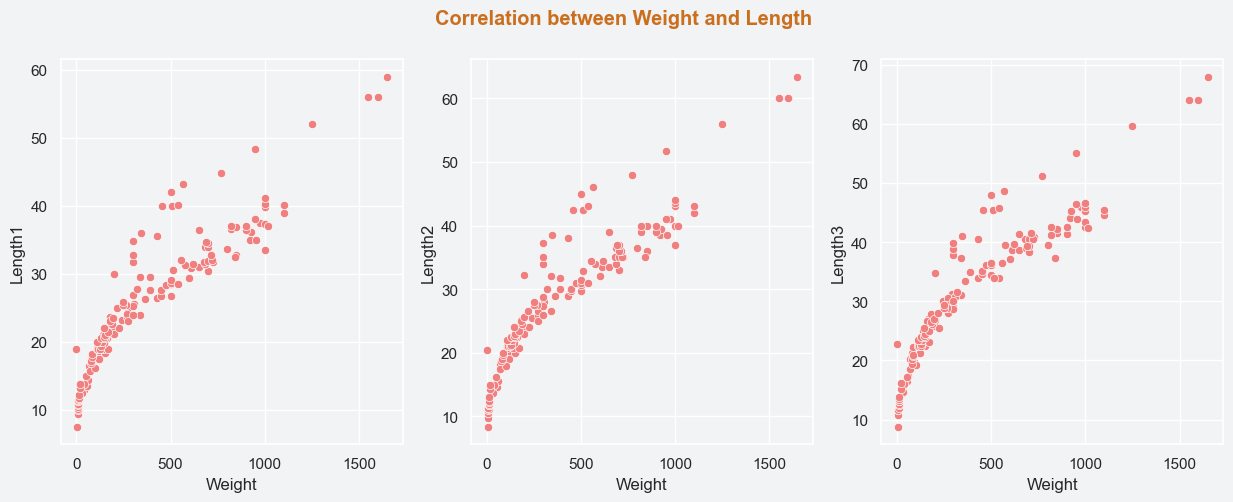

,Length1,Length2,Length3,Weight
Length1,1.000000,0.999517,0.992031,0.915712
Length2,0.999517,1.000000,0.994103,0.918618
Length3,0.992031,0.994103,1.000000,0.923044
Weight,0.915712,0.918618,0.923044,1.000000


In [6]:
# Identify all length-related columns using pattern matching
condition = df.columns.str.contains("Length")
all_length = df.columns[condition].tolist()

plt.figure(figsize=(15, 5))

# Plot scatterplots for each length feature vs. weight
for idx, column in enumerate(all_length):
    plt.subplot(1, 3, idx + 1)
    sns.scatterplot(data=df, x="Weight", y=column)

plt.suptitle("Correlation between Weight and Length", weight="bold", color="#CA6F1E")
plt.show()

# Correlation matrix between Lengths and Weight
df[["Length1", "Length2", "Length3", "Weight"]].corr()

# Step 7: Explore Weight Distribution Across Fish Specie

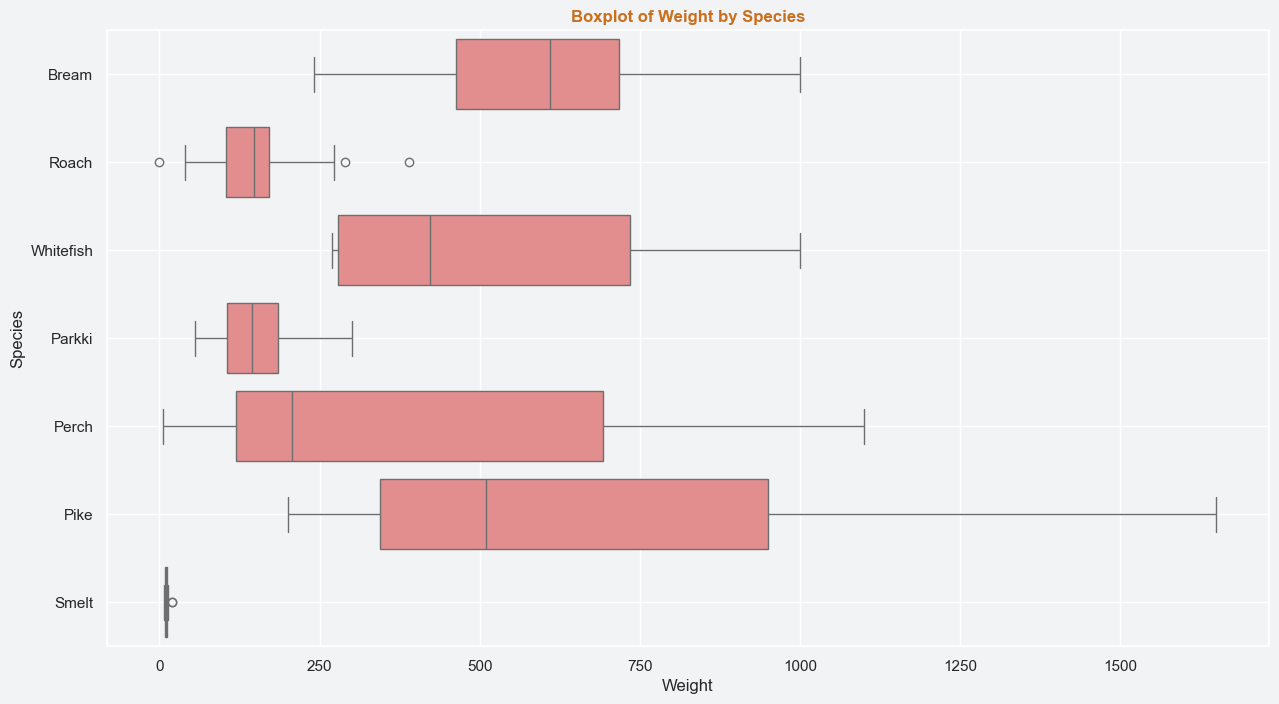

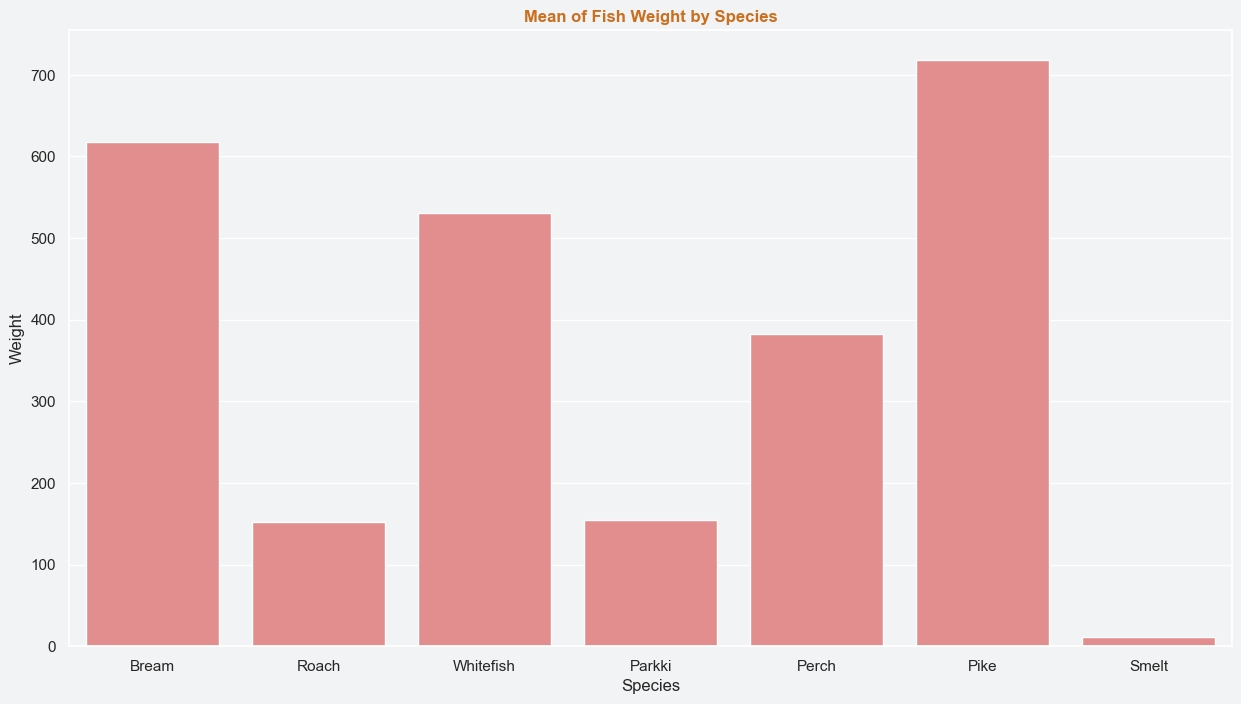

In [7]:
# Boxplot for weight across different species
sns.boxplot(data=df, x="Weight", y="Species")
plt.title('Boxplot of Weight by Species', weight="bold", color="#CA6F1E")
plt.xlabel('Weight')
plt.ylabel('Species')
plt.grid(True)
plt.show()

# Barplot showing mean weight per species
sns.barplot(data=df, x="Species", y="Weight", estimator='mean', errorbar=('ci', False))
plt.title('Mean of Fish Weight by Species', weight="bold", color="#CA6F1E")
plt.xlabel('Species')
plt.ylabel('Weight')
plt.show()

# Step 8: Visualize Pairwise Relationships Between All Feature

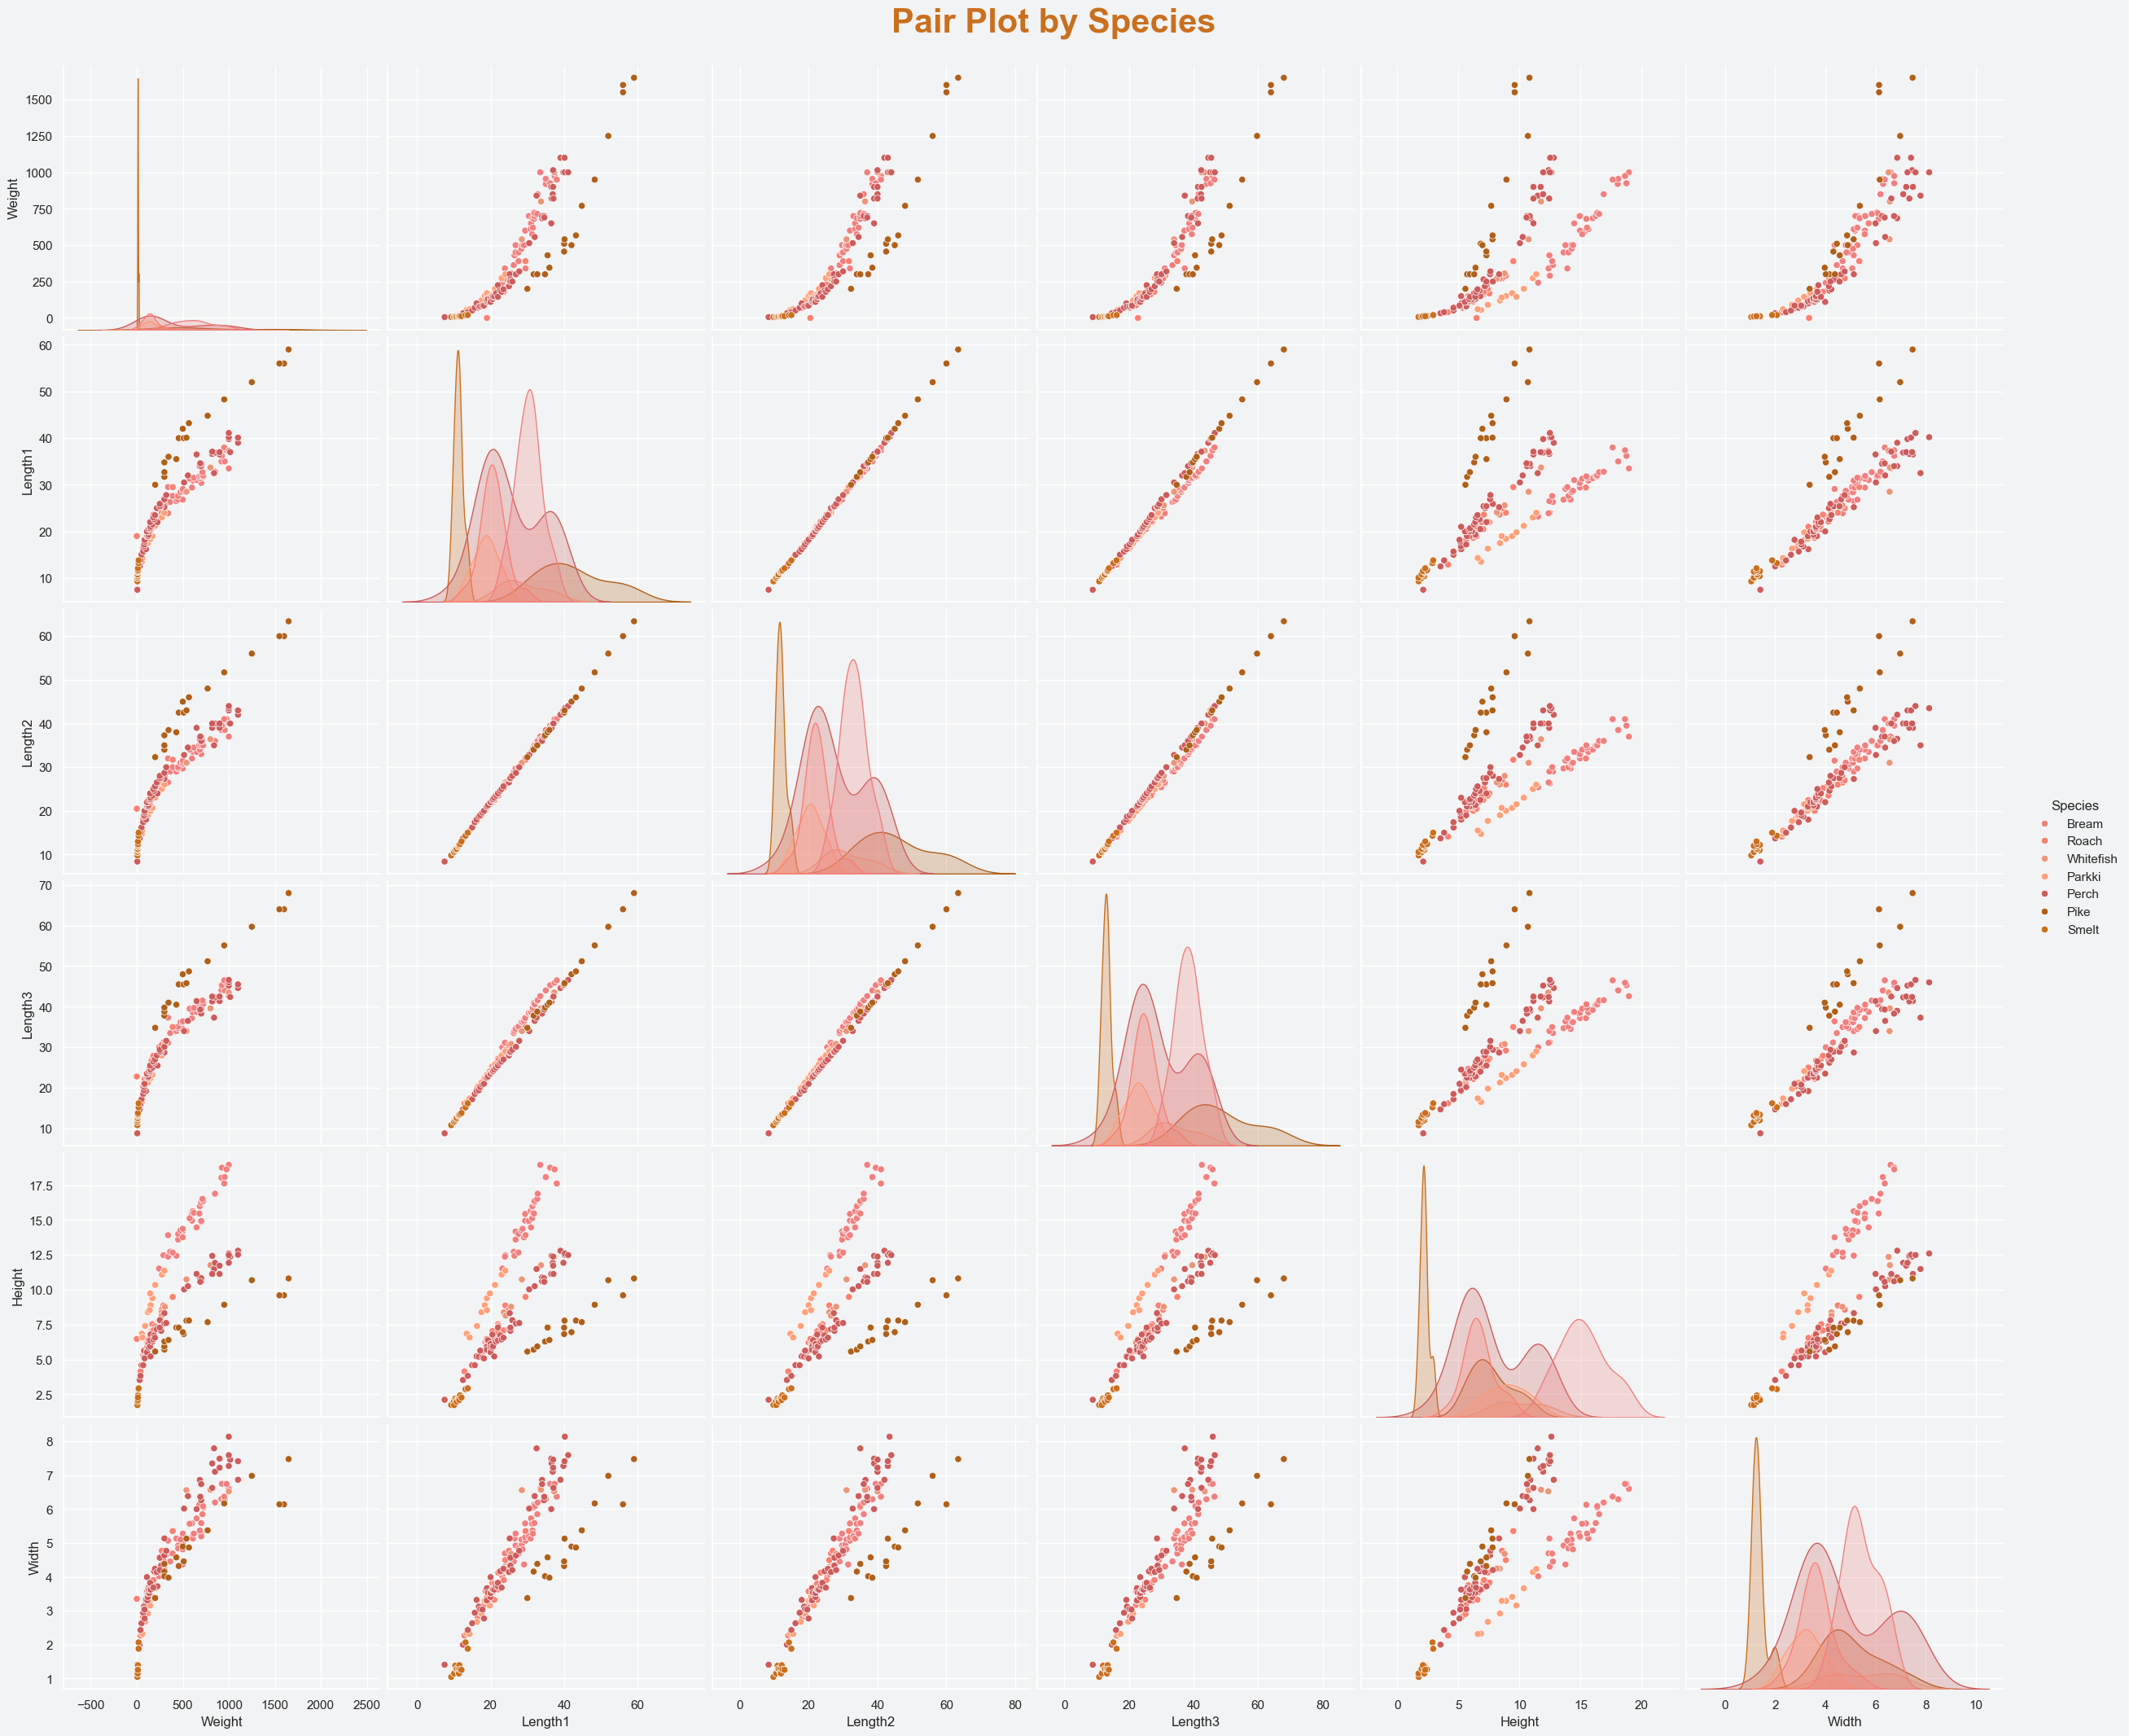

In [8]:
pair_plot = sns.pairplot(
    data=df,
    hue="Species",         # Color points by species
    diag_kind="kde",       # Show density plots on the diagonals
    height=3.5,
    aspect=1.2
)

pair_plot.fig.suptitle("Pair Plot by Species", y=1.02, fontsize=30, weight="bold", color="#CA6F1E")
plt.show()

# Step 9: Feature Engineering – Remove Redundant Length Columns

In [9]:
# Drop features with high multicollinearity or redundancy
df.drop(columns=["Length2", "Length3"], inplace=True)

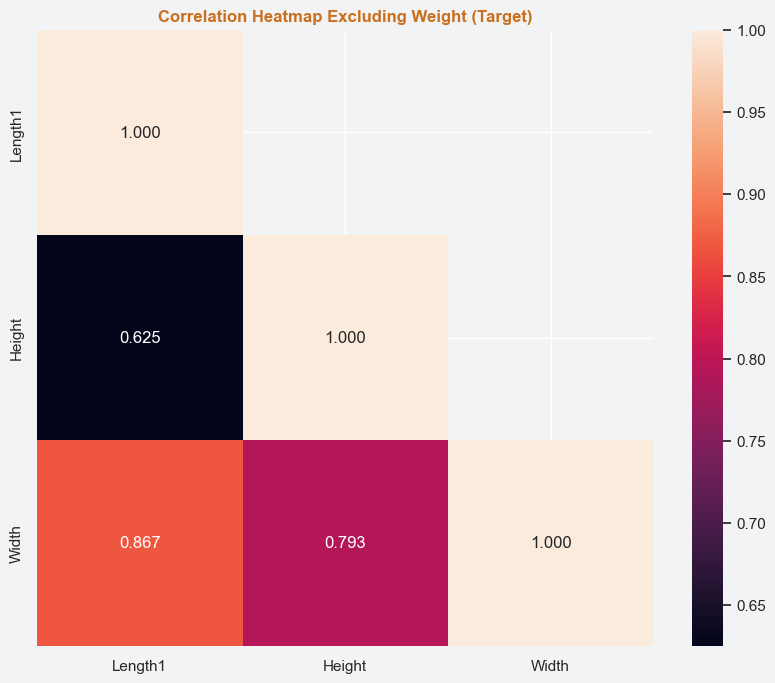

In [10]:
import numpy as np

# Compute correlation matrix excluding the target
multi_corr = df.drop("Weight", axis=1).corr(numeric_only=True)

# Mask upper triangle for clean heatmap display
mask = np.triu(np.ones_like(multi_corr), k=1)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(multi_corr, annot=True, mask=mask, square=True, fmt="0.3f")
plt.title("Correlation Heatmap Excluding Weight (Target)", weight="bold", color="#CA6F1E")
plt.show()

# Step 10: Split the Data into Features and Target

In [11]:
# Define the target column
target = "Weight"

# Separate features (X) and target (y)
X = df.drop(target, axis=1)
y = df[target]

# Step 11: Import Required Modules from Scikit-learn

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Step 12: Split Data into Training and Testing Set

In [13]:
# Split the dataset: 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, shuffle=True
)

# Display the shapes of the splits
print(f"X Train Shape : {X_train.shape}")
print(f"y Train Shape : {y_train.shape}")
print(f"X Test Shape  : {X_test.shape}")
print(f"y Test Shape  : {y_test.shape}")

X Train Shape : (119, 4)
y Train Shape : (119,)
X Test Shape  : (40, 4)
y Test Shape  : (40,)


# Step 13: Identify Numerical and Categorical Columns for Preprocessing

In [14]:
num_feat = X.select_dtypes(include="number").columns.to_list()
categ_feat = X.select_dtypes(exclude="number").columns.to_list()

print(f"Numerical Features: {num_feat}")
print(f"Categorical Features: {categ_feat}")

Numerical Features: ['Length1', 'Height', 'Width']
Categorical Features: ['Species']


# Step 14: Build ColumnTransformer to Scale Numeric and Encode Categorical Features

In [15]:
# Create preprocessing pipeline
preprocess_cols = ColumnTransformer([
    ("Numerical Cols", StandardScaler(), num_feat),
    ("Categorical Cols", OneHotEncoder(), categ_feat)
])

# Fit and transform the data
preprocess_cols.fit(X_train)
X_train_final = preprocess_cols.transform(X_train)
X_test_final = preprocess_cols.transform(X_test)

In [ ]:
# Initialize and fit the model
lin_reg = LinearRegression()
lin_reg.fit(X_train_final, y_train)
# Predict on training and testing data
train_pred = lin_reg.predict(X_train_final)
test_pred = lin_reg.predict(X_test_final)

# Evaluate MSE
print(f"MSE (Train): {round(mean_squared_error(y_train, train_pred), 2)}")
print(f"MSE (Test) : {round(mean_squared_error(y_test, test_pred), 2)}")

# Evaluate MAE
print(f"MAE (Train): {round(mean_absolute_error(y_train, train_pred), 2)}")
print(f"MAE (Test) : {round(mean_absolute_error(y_test, test_pred), 2)}")

# Evaluate R² Score
print(f"R² (Train): {round(r2_score(y_train, train_pred) * 100, 2)} %")
print(f"R² (Test) : {round(r2_score(y_test, test_pred) * 100, 2)} %")